In [ ]:
#Masking the images obtained to improve the accuracy of the model

import cv2
import numpy as np
import glob

count = 1
## Reading the images
# Preprocessing the images
path = glob.glob("/content/drive/MyDrive/DataSet/Test/Weed/*.jpg")
for n in path:
    img = cv2.imread(n)
    ## convert to hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    ## mask of green (36,25,25) ~ (86, 255,255)
    ##mask = cv2.inRange(hsv, (0, 0, 0), (180, 255, 55))
    mask = cv2.inRange(hsv, (15, 45, 25), (86, 255, 255))   #for green
    '''mask1 = cv2.inRange(hsv, (5, 45, 25), (20, 255, 255))  #for red
    mask2 = cv2.inRange(hsv, (165, 45, 25), (180, 255, 255))
    mask = mask1 + mask2'''
    # mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

    ## slice the green
    imask = mask > 0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]

    #dilation
    kernel = np.ones((2, 2), np.uint8)
    erosion = cv2.erode(green, kernel, iterations=2)
    dilate = cv2.dilate(erosion, kernel, iterations=2)
    count = count+1

    #Writing and saving the procesed image in the same directory
    cv2.imwrite(f"{count}.jpg", dilate)

    



In [2]:
#Building a CNN(Convolutional Neural Netwrok)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the random seed
tf.random.set_seed(42)

#Pre-processing the data using augmentation..
#Augmentation causes a wider range of modes and angles for data thus producing diversity and increasing the accuracy
train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = "/content/drive/MyDrive/DataSet/Train"
test_dir = "/content/drive/MyDrive/DataSet/Test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

#Build the CNN(Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(25, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(20, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(15, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the CNN Model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fitting the model
history_1 = model_1.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 82 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/15
3/3 [==============================] - 1s 329ms/step - loss: 0.6949 - accuracy: 0.4634 - val_loss: 0.6899 - val_accuracy: 0.6250
Epoch 2/15
3/3 [==============================] - 1s 196ms/step - loss: 0.6937 - accuracy: 0.5244 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 1s 245ms/step - loss: 0.6945 - accuracy: 0.5122 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 4/15
3/3 [==============================] - 1s 225ms/step - loss: 0.6889 - accuracy: 0.6220 - val_loss: 0.6872 - val_accuracy: 0.5625
Epoch 5/15
3/3 [==============================] - 1s 171ms/step - loss: 0.6898 - accuracy: 0.5244 - val_loss: 0.6861 - val_accuracy: 0.4375
Epoch 6/15
3/3 [==============================] - 1s 197ms/step - loss: 0.6865 - accuracy: 0.5610 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 7/15
3/3 [==============================] - 1s 261ms/step - loss: 0.6829 -

In [3]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 25)      2275      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 25)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 20)      4520      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 20)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 15)       

In [4]:
model_1.evaluate(valid_data)

1/1 [==============================] - 0s 141ms/step - loss: 0.6469 - accuracy: 0.8125


[0.6469463109970093, 0.8125]

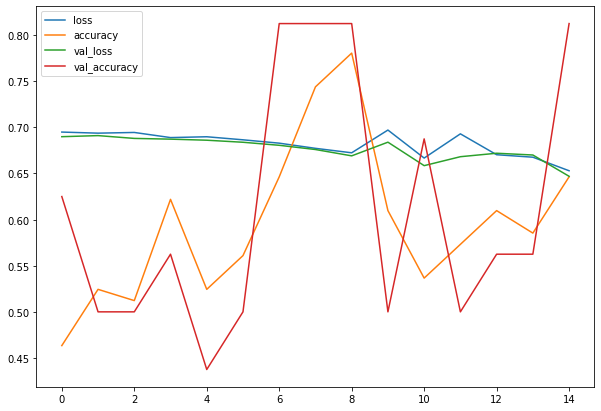

In [5]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [6]:
model_1.predict(valid_data)

1/1 [==============================] - 0s 201ms/step


array([[0.4693687 ],
       [0.47420353],
       [0.486456  ],
       [0.46526414],
       [0.43027046],
       [0.5021241 ],
       [0.49767438],
       [0.530485  ],
       [0.5674881 ],
       [0.5299996 ],
       [0.50606394],
       [0.45587397],
       [0.5505969 ],
       [0.49903545],
       [0.5735008 ],
       [0.43709362]], dtype=float32)

In [7]:
Y_probs = model_1.predict(valid_data)
Y_probs = tf.squeeze(Y_probs)
Y_probs

1/1 [==============================] - 0s 136ms/step


<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0.5299996 , 0.46526414, 0.486456  , 0.5674881 , 0.47420353,
       0.43027046, 0.49903545, 0.5735008 , 0.50606394, 0.5505969 ,
       0.49767438, 0.4693687 , 0.5021241 , 0.43709362, 0.530485  ,
       0.45587397], dtype=float32)>

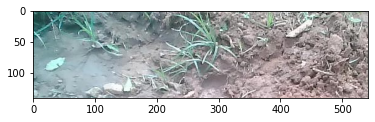

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
weed = mpimg.imread("/content/drive/MyDrive/DataSet/Test/Weed/1.jpg")
plt.imshow(weed)

In [9]:
#viewing a random image from the test dataset and using it to evaluate induvidually

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") 
  
  # show the shape of the image
  return img

Image shape: (480, 640, 3)


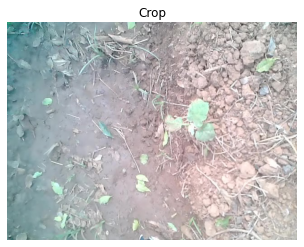

In [10]:
img = view_random_image(target_dir="/content/drive/MyDrive/DataSet/Test/",
                        target_class="Crop")

In [11]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255
  return img

In [12]:
#Calling the function to use it to predict in the model by adjusting the dimension

crop = load_and_prep_image("/content/drive/MyDrive/DataSet/Test/Crop/4.jpg")
crop

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.31284514, 0.439976  , 0.44994   ],
        [0.3337335 , 0.52300924, 0.51292515],
        [0.2462585 , 0.42797115, 0.420168  ],
        ...,
        [0.8097651 , 0.8450592 , 0.8332945 ],
        [0.7736297 , 0.816767  , 0.8010807 ],
        [0.8074824 , 0.8506197 , 0.8349334 ]],

       [[0.34321728, 0.5028011 , 0.50140053],
        [0.23389359, 0.41524613, 0.40736297],
        [0.20920366, 0.37190875, 0.36938775],
        ...,
        [0.50171876, 0.5370129 , 0.52524817],
        [0.53229386, 0.5754311 , 0.55974483],
        [0.76166517, 0.8048025 , 0.7891162 ]],

       [[0.21984796, 0.41056424, 0.39935976],
        [0.12140857, 0.28251302, 0.2812325 ],
        [0.16526613, 0.3042017 , 0.3114846 ],
        ...,
        [0.43817937, 0.4734735 , 0.46170878],
        [0.6549027 , 0.69187754, 0.6792725 ],
        [0.8163225 , 0.85945976, 0.8437735 ]],

       ...,

       [[0.49387756, 0.62328935, 0.58799523],
        [0.49

In [13]:
model_1.predict(tf.expand_dims(crop, axis=0))

1/1 [==============================] - 0s 195ms/step


array([[0.4656519]], dtype=float32)

In [14]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [15]:
class_names = ["Crop", "Weed"]
tf.constant(class_names)

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Crop', b'Weed'], dtype=object)>

1/1 [==============================] - 0s 114ms/step


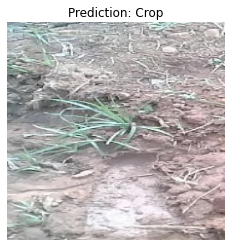

In [18]:
pred_and_plot(model_1, "/content/drive/MyDrive/DataSet/Test/Weed/2.jpg", class_names)

In [ ]:
model_1.save("working_model1")

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model("/content/working_model1")

OSError: ignored

In [ ]:
new_model.evaluate(valid_data)

1/1 [==============================] - 0s 425ms/step - loss: 0.6266 - accuracy: 0.8571


[0.6265862584114075, 0.8571428656578064]